In [7]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path = kagglehub.dataset_download("cdc/mortality")
print("Path to dataset files:", path)

df = pd.read_csv(f"{path}/2015_data.csv", low_memory=False)
df = df[df["detail_age_type"] == 1]

min_age = 0
max_age = min(df["detail_age"].max(), 115) # Er zat een leeftijd van 999 in de dataset => max 115


Path to dataset files: C:\Users\maxim\.cache\kagglehub\datasets\cdc\mortality\versions\2


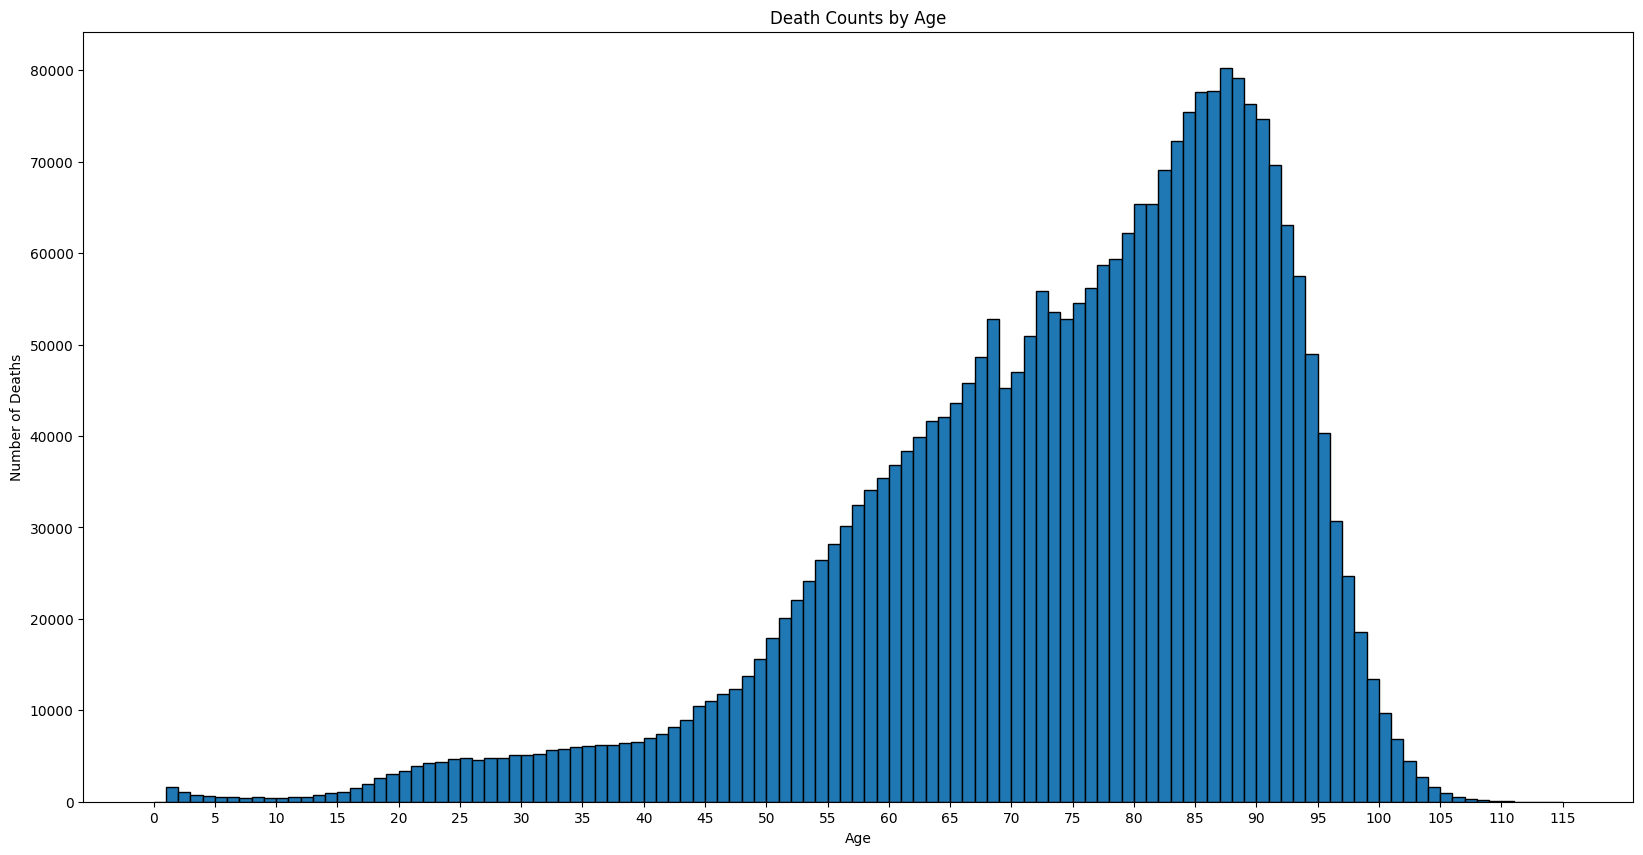

In [8]:
# ------------------- A: death count by age -------------------
plt.figure(figsize=(20, 10))
plt.hist(df["detail_age"], bins=range(min_age, max_age + 1), edgecolor='black')

# Labels and title
plt.xlabel("Age")
plt.ylabel("Number of Deaths")
plt.title("Death Counts by Age")
plt.xticks(range(min_age, max_age + 1, 5))

plt.savefig("death_counts_by_age.png")

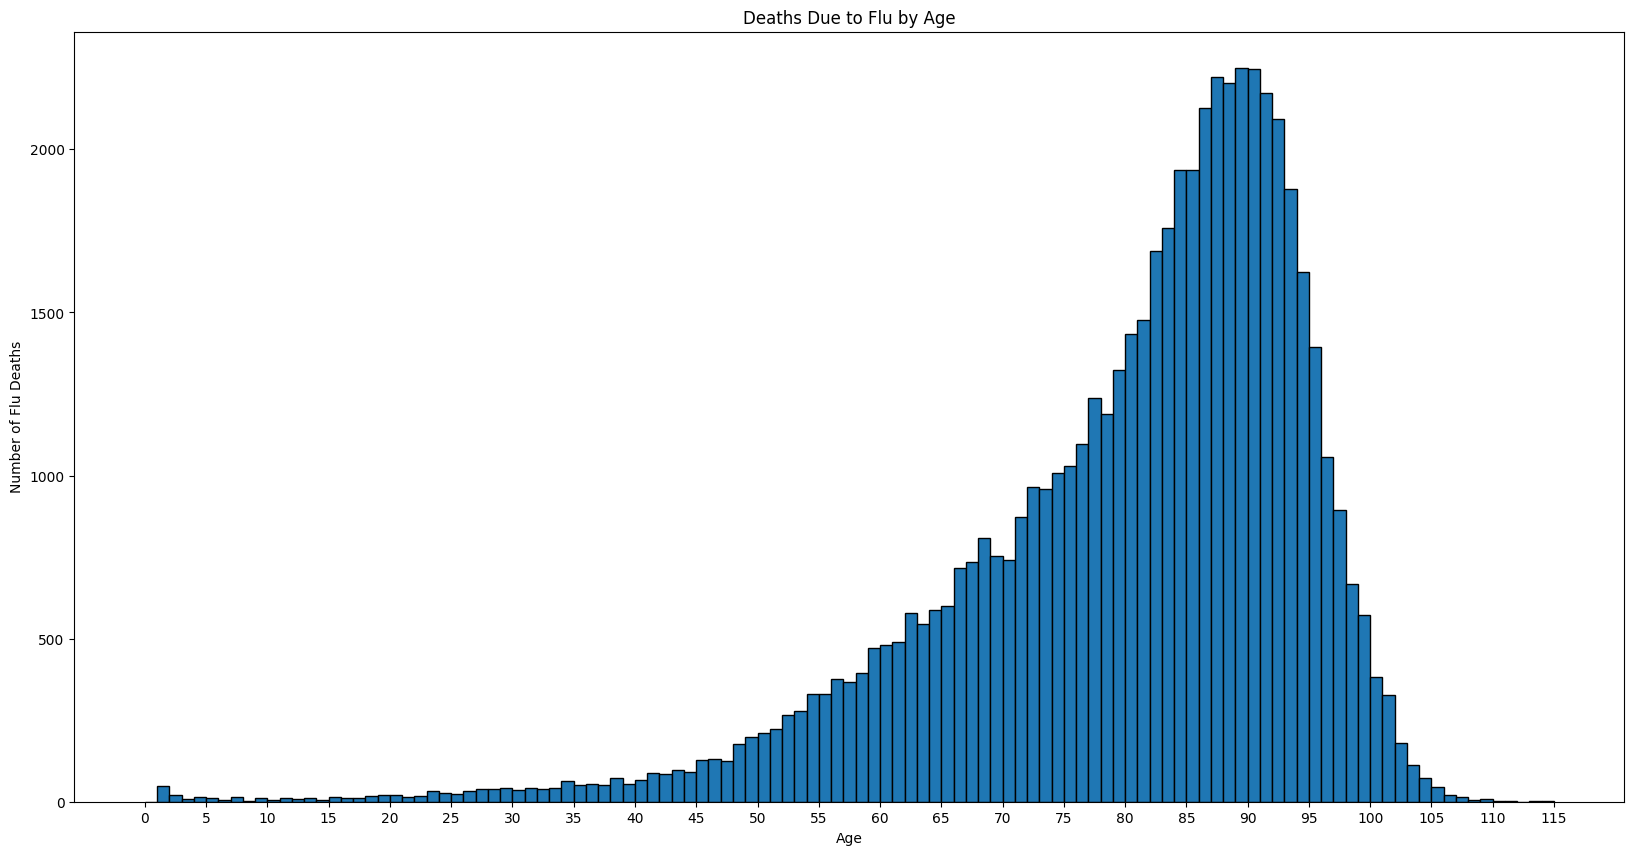

In [9]:
# ------------------- B: the flu by age-------------------
flu_code = 27 
df_flu = df[df["39_cause_recode"] == flu_code]

plt.figure(figsize=(20, 10))
plt.hist(df_flu["detail_age"], bins=range(min_age, max_age + 1), edgecolor='black')

plt.xlabel("Age")
plt.ylabel("Number of Flu Deaths")
plt.title("Deaths Due to Flu by Age")
plt.xticks(range(min_age, max_age + 1, 5))

plt.savefig("flu_deaths_by_age.png")

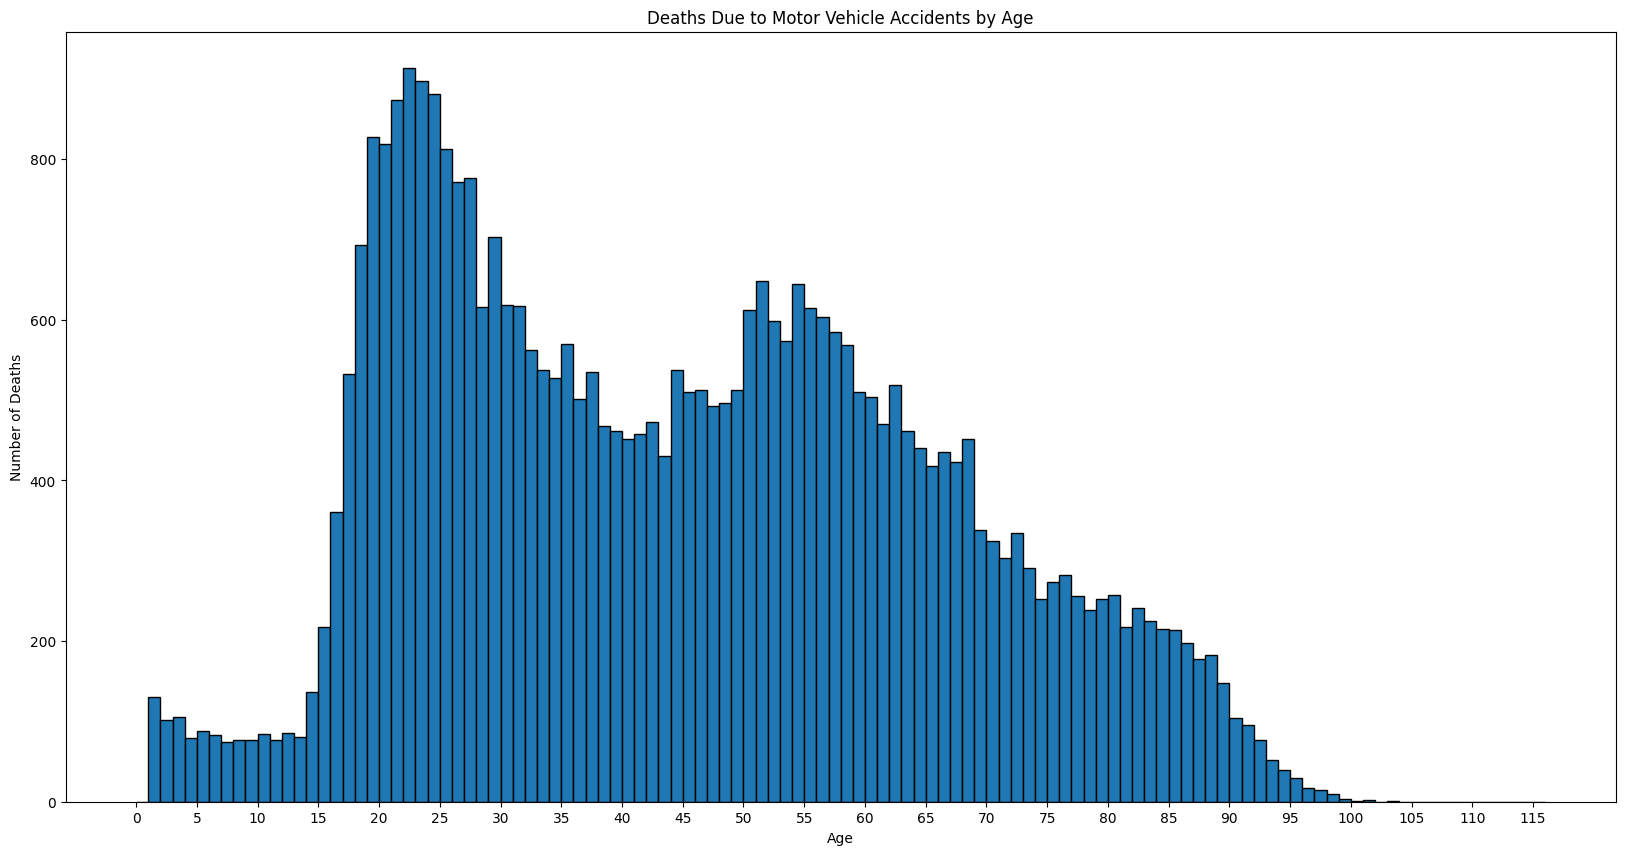

In [10]:
# ------------------- E.1: death count by Motor Vehicle Accident -------------------
motor_vehicle_code = 38
df_motor_vehicle = df[df["39_cause_recode"] == motor_vehicle_code]

plt.figure(figsize=(20, 10))
plt.hist(df_motor_vehicle["detail_age"], bins=range(min_age, max_age + 2), edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Number of Deaths")
plt.title("Deaths Due to Motor Vehicle Accidents by Age")
plt.xticks(range(min_age, max_age + 1, 5))
plt.savefig("motor_vehicle_accident_deaths_by_age.png")

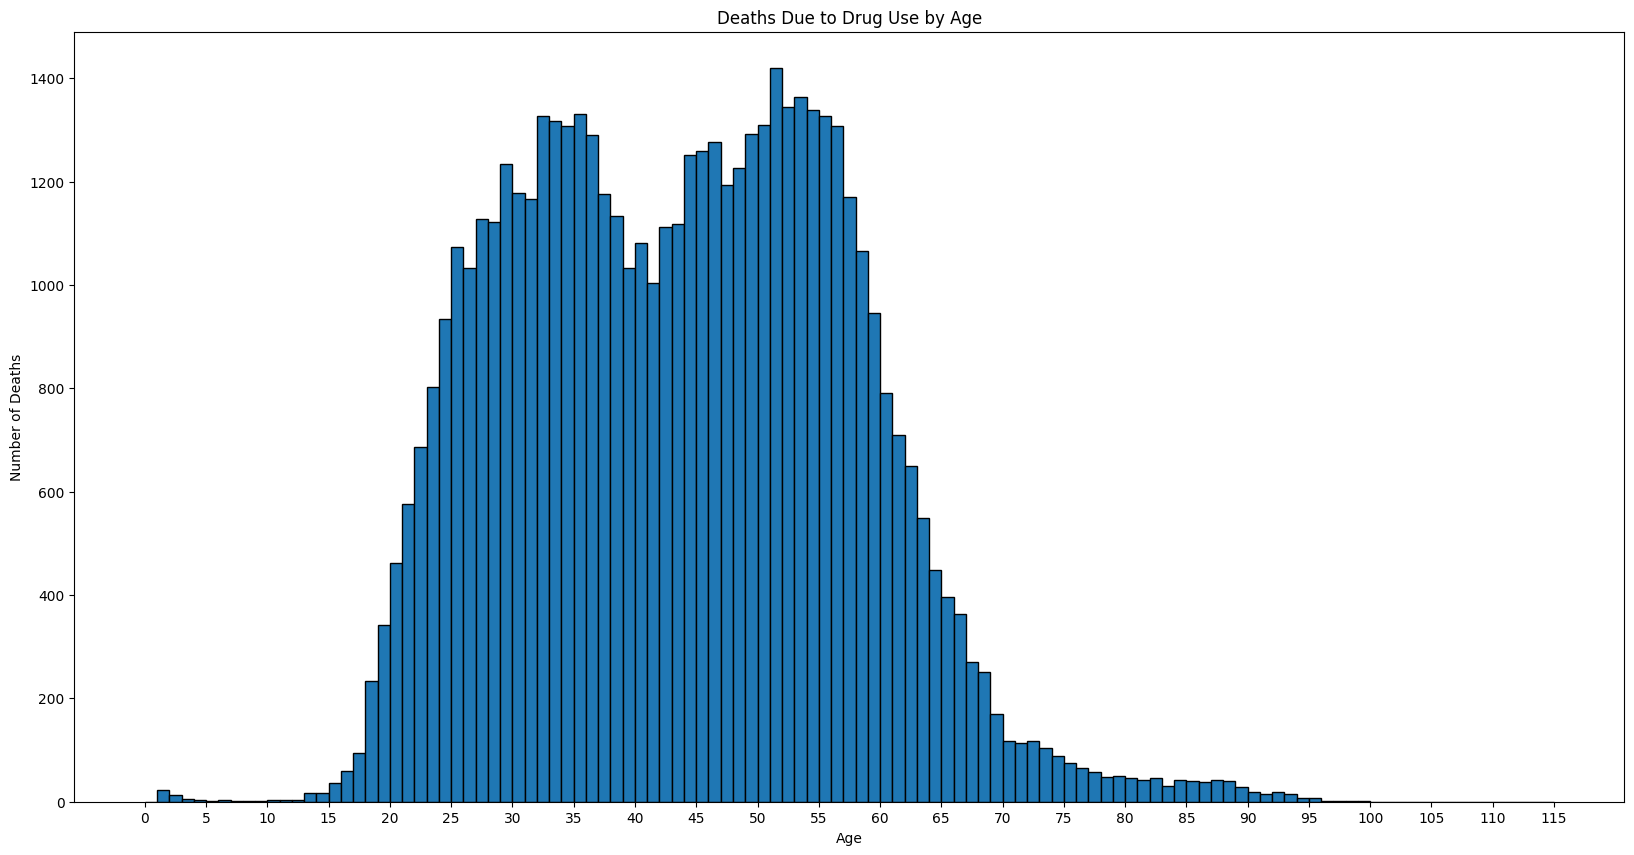

In [11]:
# ------------------- E.2: death count by Drug Use -------------------
drug_icd_codes = ["X40", "X41", "X42", "X43", "X44",  # Accidental poisoning by drugs
                  "X60", "X61", "X62", "X63", "X64",  # Intentional self-poisoning
                  "Y10", "Y11", "Y12", "Y13", "Y14"]  # Undetermined drug poisoning

df_drug_use = df[df["icd_code_10th_revision"].isin(drug_icd_codes)]

plt.figure(figsize=(20, 10))
plt.hist(df_drug_use["detail_age"], bins=range(min_age, max_age + 1), edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Number of Deaths")
plt.title("Deaths Due to Drug Use by Age")
plt.xticks(range(min_age, max_age + 1, 5))
plt.savefig("drug_use_deaths_by_age.png")

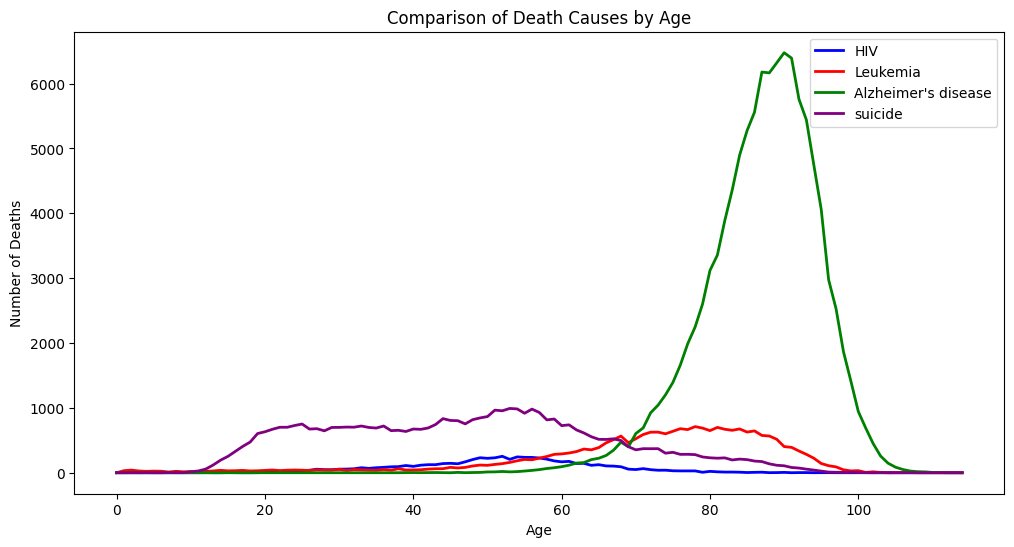

In [12]:
# ------------------- G: Comparision Visualization -------------------
cause_codes = {
    "HIV": 3,
    "Leukemia": 14,
    "Alzheimer's disease": 17,
    "suicide": 40
}

age_distribution = {}

for cause, code in cause_codes.items():
    df_cause = df[df["39_cause_recode"] == code]
    age_counts, _ = np.histogram(df_cause["detail_age"], bins=range(min_age, max_age + 1))
    age_distribution[cause] = age_counts

plt.figure(figsize=(12, 6))

colors = ["blue", "red", "green", "purple"]
for (cause, counts), color in zip(age_distribution.items(), colors):
    plt.plot(range(min_age, max_age), counts, label=cause, color=color, linewidth=2)

plt.xlabel("Age")
plt.ylabel("Number of Deaths")
plt.title("Comparison of Death Causes by Age")
plt.legend()
plt.savefig("comparison.png")

# Why This Design Works?
#     Users can compare death risks at different ages clearly.
#     The overlayed lines highlight how risk levels vary across age groups.
#     The legend and colors make it easy to differentiate causes.
